In [13]:
# import numpy and pandas from libraries

import numpy as np
import pandas as pd

# access the link the provided in class, and read the csv file
adult_training_DF = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")
adult_training_DF

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


In [14]:
#print out the top five rows of the dataframe

adult_training_DF.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K


In [15]:
# Training Data Preparation for Classification

# Create a new predictor
adult_training_DF['capital-gains-losses'] = adult_training_DF['capital-gain'] + abs(adult_training_DF['capital-loss'])


# Create a new dataframe for the classification task with only three columns: two predictors and a target
adult_training_DF2 = adult_training_DF.filter(['marital-status','capital-gains-losses','income'], axis=1)

adult_training_DF2.head(10)

,marital-status,capital-gains-losses,income
0,Married-civ-spouse,0,<=50K
1,Divorced,0,<=50K
2,Married-spouse-absent,0,<=50K
3,Married-civ-spouse,0,>50K
4,Never-married,14084,>50K
5,Married-civ-spouse,0,>50K
6,Married-civ-spouse,0,<=50K
7,Married-civ-spouse,2042,<=50K
8,Married-civ-spouse,0,>50K
9,Divorced,0,<=50K


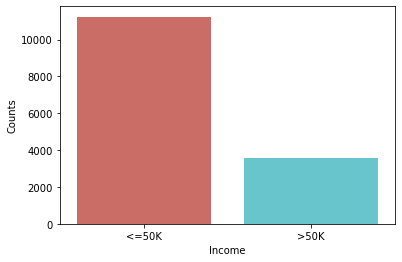

In [16]:
# Examine target class distrbutions

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=adult_training_DF2, palette = 'hls')
plt.xlabel('Income')
plt.ylabel('Counts')
plt.show()

In [17]:
# We now need to encode the categoric columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_adultDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, adult_training_DF2.shape[1]):
    if adult_training_DF2.dtypes[i]=='object' or adult_training_DF2.dtypes[i]=='bool':
        encoded_adultDF[adult_training_DF2.columns[i]] = le.fit_transform(adult_training_DF2[adult_training_DF2.columns[i]])
    else:
        encoded_adultDF[adult_training_DF2.columns[i]] = adult_training_DF2[adult_training_DF2.columns[i]]
        
encoded_adultDF.head(10)

,marital-status,capital-gains-losses,income
0,2,0,0
1,0,0,0
2,3,0,0
3,2,0,1
4,4,14084,1
5,2,0,1
6,2,0,0
7,2,2042,0
8,2,0,1
9,0,0,0


In [18]:
# Train_Test_Split

from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_adultDF.filter(['marital-status','capital-gains-losses'], axis=1)
y = encoded_adultDF['income']


# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

In [19]:
print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (11837, 2)
Test size: (2960, 2)


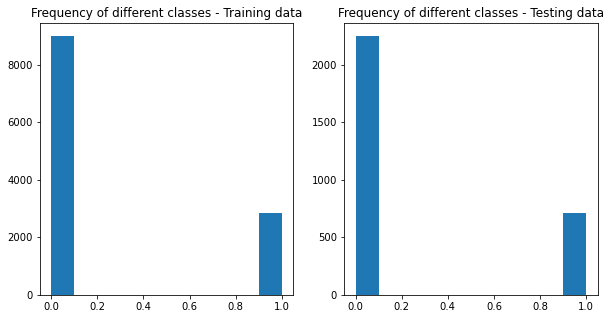

In [20]:
# Find out class distributions in training and test datasets.

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequency of different classes - Testing data');

In [31]:
# Training, Plotting, and Printing Decision Trees

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

cn = ['low_income', 'hi_income']


# create a first function to make decision tree model 

def makeDTModel(criterion, X_train, y_train, max_depth = None, max_leaf_nodes = None):
  descisionTree = DecisionTreeClassifier(criterion = criterion, max_depth = max_depth, 
                                         max_leaf_nodes = max_leaf_nodes, random_state = 120)



  descisionTree.fit(X_train,y_train)
  return descisionTree



In [32]:
# creating a new function to display the tree

# display a tree classifier
def displayTree(classifier, X):
  tree.plot_tree(classifier, feature_names=X.columns.values.tolist(), class_names=cn, filled = True)

In [33]:
# creating a new function to display the CM

# display heatmap of the matrix

def displayCM(classifier, X_train, y_train, X_test, y_test):
    
    # make predictions
  predictions = classifier.predict(X_test)
  cm = confusion_matrix(y_true=y_test, y_pred = predictions)
    
  print(cm)
  
  sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title("Cart classifier")

In [24]:
# create a new function to compare those models


def compareModels(cart_classifier, c5_classifier):
  labels = ['CART', 'C5.0']

    # Record CART's classification accuracy on tarining and test datasets
    
    # It will show the training score
  cart_train_score1 = round(cart_classifier.score(X_train, y_train), 2) 
    # it will show the test score
  cart_test_score1 = round(cart_classifier.score(X_test, y_test), 2)   

  print ("CART Training and Testing scores: %.2f, %.2f" %  (cart_train_score1, cart_test_score1))


  # Record C5's classification accuracy on tarining and test datasets

  c5_train_score1 = round(c5_classifier1.score(X_train, y_train), 2) 
  c5_test_score1 = round(c5_classifier1.score(X_test, y_test), 2)  

  print ("C5.0 Training and Testing scores: %.2f, %.2f" %  (c5_train_score1, c5_test_score1))


  training_scores = [cart_train_score1, c5_train_score1]
  testing_scores =  [cart_test_score1, c5_test_score1]

  x = np.arange(2) 
  width = 0.35  

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='orange')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='blue')


  ax.set_ylabel('Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Comparisons')
  plt.show()

In [41]:
# analysis of the max depth and max leaf node of arruracy
# The parameter will be the max depth(none, 2, 3, 4) and 
# the max leaf node(none, 3,4,5)




#  max_depth=2 and max leaf nodes=3

cart_classifier1 = makeDTModel("gini", X_train, y_train,2,3)
c5_classifier1 = makeDTModel("entropy", X_train, y_train,2,3)

#  max_depth=3 and max leaf nodes=4

cart_classifier2 = makeDTModel("gini", X_train, y_train,3,4)
c5_classifier2 = makeDTModel("entropy", X_train, y_train,3,4)

#  max_depth=4 and max leaf nodes=5

cart_classifier3 = makeDTModel("gini", X_train, y_train,4,5)
c5_classifier3 = makeDTModel("entropy", X_train, y_train,4,5)

#  max_depth is equal to Na and max leaf nodes is equal to Na

cart_classifier4 = makeDTModel("gini", X_train, y_train)
c5_classifier4 = makeDTModel("entropy", X_train, y_train)



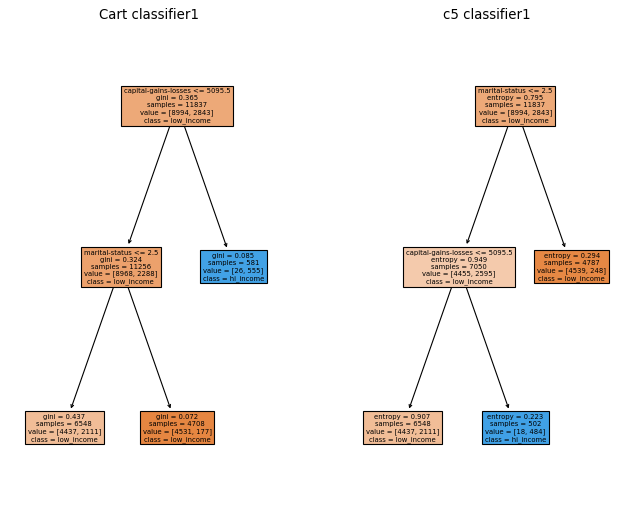

In [42]:
# display the descision tree, and CM arruracy for cart and C5 for max depth 2, 
# max leaf node 3


# Display tree for cart

plt.figure(figsize=(10, 8), dpi=80)
plt.subplot(1,2,1)
displayTree(cart_classifier1, X)
plt.title("Cart classifier1")

# Display tree for c5

plt.subplot(1,2,2)
displayTree(c5_classifier1, X)
plt.title("c5 classifier1")
plt.show()

   cart    
[[2238   11]
 [ 583  128]]
    c5     
[[2243    6]
 [ 597  114]]


Text(0.5, 1.0, 'C5 classifier1')

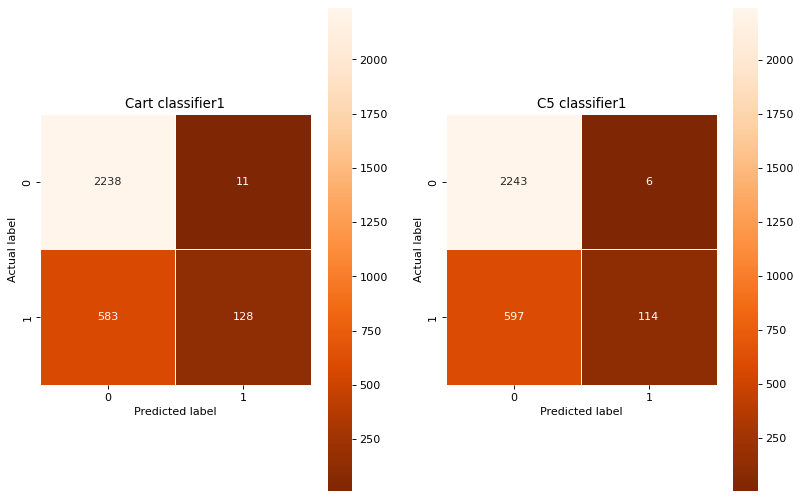

In [44]:


plt.figure(figsize=(12, 8), dpi=80)

print('   cart    ')
plt.subplot(1,2,1)
cart_cm1 = displayCM(cart_classifier1, X_train, y_train, X_test, y_test)
plt.title("Cart classifier1")

# Display CM for c5_classifier2
print('    c5     ')
plt.subplot(1,2,2)
c5_cm1 = displayCM(c5_classifier1, X_train, y_train, X_test, y_test)
plt.title("C5 classifier1")

CART Training and Testing scores: 0.80, 0.80
C5.0 Training and Testing scores: 0.80, 0.80


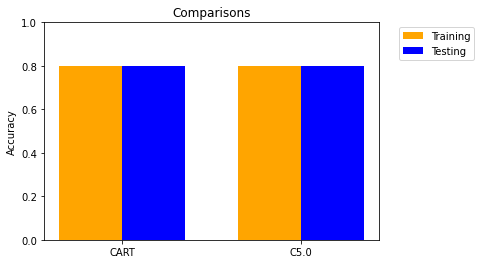

In [45]:
#  Then show the Scores and plots for model comparisons of cart classifier1 and c5 classifier1
compareModels(cart_classifier1, c5_classifier1)



# for both cart and c5, their accuracy is 0.80 of max depth and max leaf node

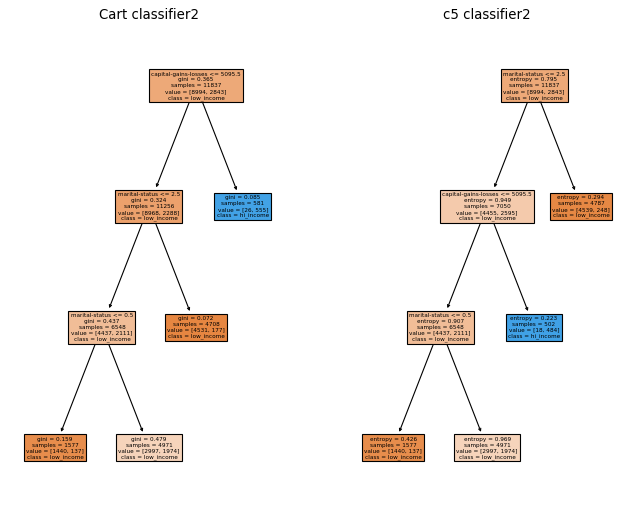

In [46]:
#  tree for cart_classifier2

plt.figure(figsize=(10, 8), dpi=80)
plt.subplot(1,2,1)
displayTree(cart_classifier2, X)
plt.title("Cart classifier2")

# Display tree for c5_classifier2
plt.subplot(1,2,2)
displayTree(c5_classifier2, X)
plt.title("c5 classifier2")
plt.show()


       cart      
[[2238   11]
 [ 583  128]]
      c5     
[[2243    6]
 [ 597  114]]


Text(0.5, 1.0, 'C5 classifier2')

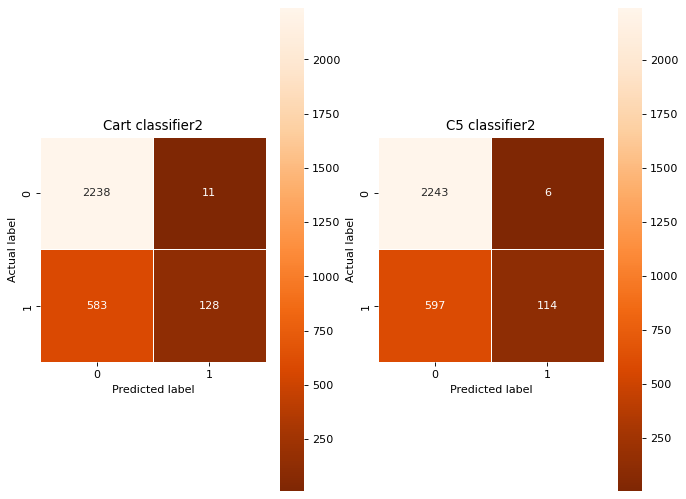

In [50]:
# Display CM for cart_classifier2
plt.figure(figsize=(10, 8), dpi=80)

print('       cart      ')
plt.subplot(1,2,1)
cart_cm2 = displayCM(cart_classifier2, X_train, y_train, X_test, y_test)
plt.title("Cart classifier2")

# Display CM for c5_classifier2
print('      c5     ')
plt.subplot(1,2,2)
c5_cm2 = displayCM(c5_classifier2, X_train, y_train, X_test, y_test)
plt.title("C5 classifier2")

CART Training and Testing scores: 0.80, 0.80
C5.0 Training and Testing scores: 0.80, 0.80


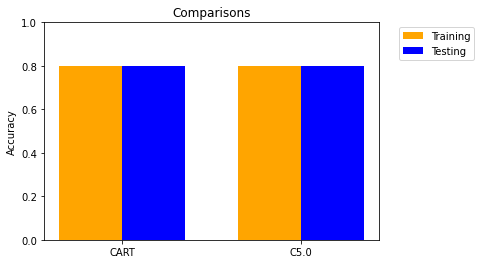

In [48]:
#  Then show the Scores and plots for model comparisons of cart classifier2 and c5 classifier2
compareModels(cart_classifier2, c5_classifier2)


# for both cart and c5, their accuracy is 0.80 of max depth and max leaf node in classifier2

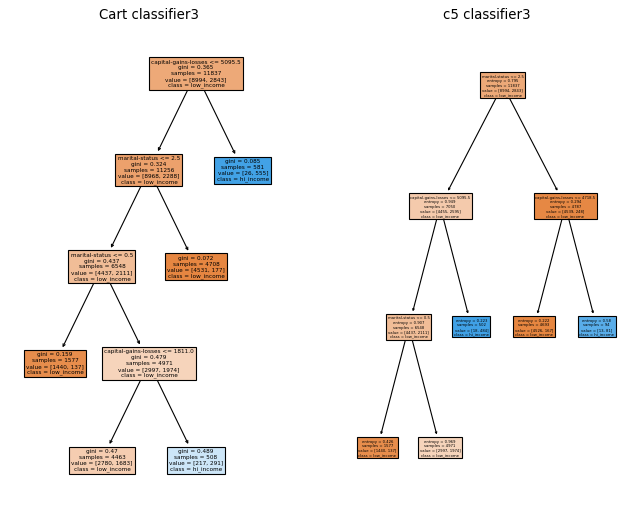

In [49]:
#  tree for cart_classifier3

plt.figure(figsize=(10, 8), dpi=80)
plt.subplot(1,2,1)
displayTree(cart_classifier3, X)
plt.title("Cart classifier3")

#  tree for c5_classifier3
plt.subplot(1,2,2)
displayTree(c5_classifier3, X)
plt.title("c5 classifier3")
plt.show()

         cart       
[[2187   62]
 [ 511  200]]
          c5        
[[2235   14]
 [ 583  128]]


Text(0.5, 1.0, 'C5 classifier3')

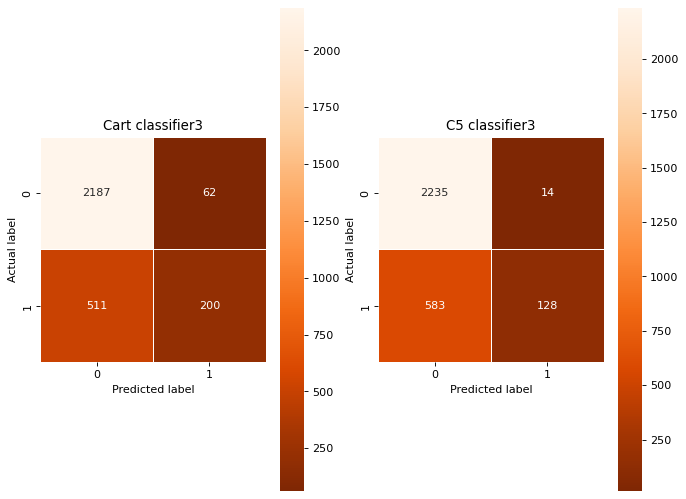

In [51]:
# Display CM for cart_classifier3
plt.figure(figsize=(10, 8), dpi=80)

print('         cart       ')
plt.subplot(1,2,1)
cart_cm3 = displayCM(cart_classifier3, X_train, y_train, X_test, y_test)
plt.title("Cart classifier3")

# Display CM for c5_classifier3
print('          c5        ')
plt.subplot(1,2,2)
c5_cm3 = displayCM(c5_classifier3, X_train, y_train, X_test, y_test)
plt.title("C5 classifier3")

CART Training and Testing scores: 0.81, 0.81
C5.0 Training and Testing scores: 0.80, 0.80


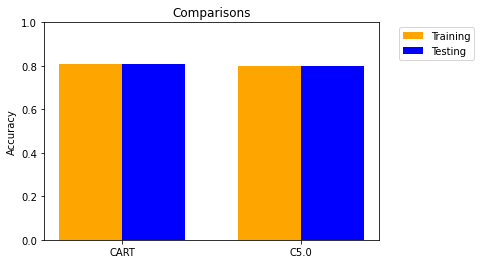

In [52]:
#  Then show the Scores and plots for model comparisons of cart classifier3 and c5 classifier3
compareModels(cart_classifier3, c5_classifier3)



# the accuracy of max depth and max leaf node for cart is 0.81, and for c5 is 0.80

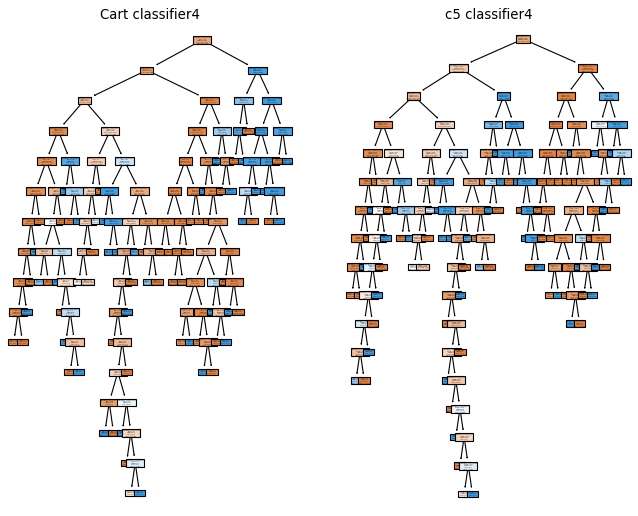

In [53]:
# tree for cart_classifier4

plt.figure(figsize=(10, 8), dpi=80)
plt.subplot(1,2,1)
displayTree(cart_classifier4, X)
plt.title("Cart classifier4")

# D tree for c5_classifier4
plt.subplot(1,2,2)
displayTree(c5_classifier4, X)
plt.title("c5 classifier4")
plt.show()

        cart      
[[2238   11]
 [ 502  209]]
        c5      
[[2237   12]
 [ 502  209]]


Text(0.5, 1.0, 'C5 classifier4')

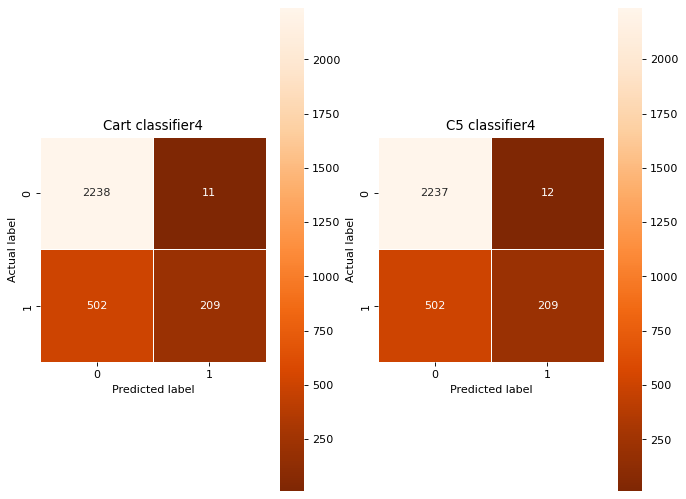

In [54]:
# Display CM for cart_classifier4
plt.figure(figsize=(10, 8), dpi=80)

print('        cart      ')
plt.subplot(1,2,1)
cart_cm4 = displayCM(cart_classifier4, X_train, y_train, X_test, y_test)
plt.title("Cart classifier4")

# Display CM for c5_classifier4
print('        c5      ')
plt.subplot(1,2,2)
c5_cm4 = displayCM(c5_classifier4, X_train, y_train, X_test, y_test)
plt.title("C5 classifier4")

CART Training and Testing scores: 0.83, 0.83
C5.0 Training and Testing scores: 0.80, 0.80


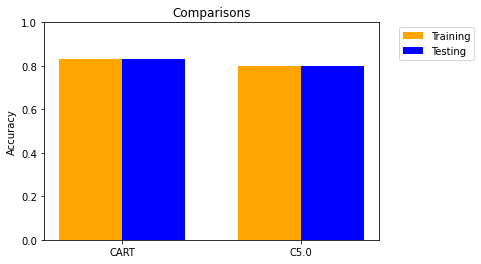

In [55]:
#  Then show the Scores and plots for model comparisons of cart classifier4 and c5 classifier4
compareModels(cart_classifier4, c5_classifier4)



# the accuracy of max depth and max leaf node for cart is 0.83, and for c5 is 0.80

In [ ]:
# summary :

# I find that increasing the limit of max depth and max leaf node 
# will also increase the accuracy. Then, for those models that we have created
# their accuracy will be different if we change the limit of the depth and max leaf 
# number. Lastly, the accuary of cart is higher than the the c5 in this case. 

# something interested me is that it is pretty like the java program, limit the max leaf node
# will impact the runing time. so ,we need to consider what balance the data property and the 
# runtime. 